In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
from sklearn import metrics
import seaborn as sns

In [ ]:
os.chdir('/content/drive/MyDrive/forest_fire_dataset/mask')
lst = os.listdir('/content/drive/MyDrive/forest_fire_dataset/og')
mask = os.listdir('/content/drive/MyDrive/forest_fire_dataset/mask')

In [ ]:
classes = []
img = []
for filename in lst:
    if filename.endswith('.png'):
        img.append(filename)
        if filename in mask:
          classes.append(1)
        else:
          classes.append(0)

In [ ]:
len(classes)

4110

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


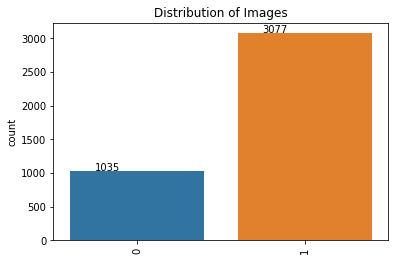

In [ ]:
plt.title('Distribution of Images')
g = sns.countplot(classes)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
for p in g.patches:
    g.annotate(p.get_height()+1, (p.get_x()+0.15, p.get_height()+2))

In [ ]:
from PIL import Image

In [ ]:
y = []
X = []

In [ ]:
for i in range(len(img)):
    dir_img = os.path.join('/content/drive/MyDrive/forest_fire_dataset/og', img[i])
    im = Image.open(dir_img)
    im = im.resize((256, 256))
    im = np.reshape(im.convert('L'), (256, 256, 1))
    X.append(im)
    y.append(classes[i])
    if i%1000 == 0:
      print(i)

0
1000
2000
3000
4000


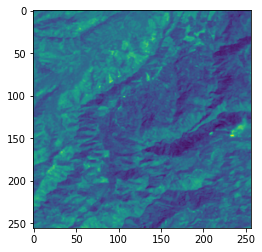

In [ ]:
im = Image.open('/content/drive/MyDrive/forest_fire_dataset/og/1_20_4.png')
im = im.resize((256,256))
im = np.reshape(im.convert('L'), (256,256,1))
plt.imshow(np.squeeze(im))

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(4110, 256, 256, 1)

In [ ]:
y.shape

(4110,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(3288, 256, 256, 1)

In [ ]:
X_test.shape

(822, 256, 256, 1)

In [ ]:
y_train.shape

(3288,)

In [ ]:
y_test.shape

(822,)

In [ ]:
#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(256,256,1), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(1))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('sigmoid'))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 96)       384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 64, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1

In [ ]:
AlexNet.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
%time hist = AlexNet.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.1)
AlexNet.evaluate(X_test, y_test)[1]

Epoch 1/100
93/93 [==============================] - 15s 135ms/step - loss: 0.1178 - accuracy: 0.9706 - val_loss: 0.5015 - val_accuracy: 0.8298
Epoch 2/100
93/93 [==============================] - 12s 126ms/step - loss: 0.1102 - accuracy: 0.9723 - val_loss: 0.4575 - val_accuracy: 0.8419
Epoch 3/100
93/93 [==============================] - 12s 129ms/step - loss: 0.0979 - accuracy: 0.9757 - val_loss: 0.4739 - val_accuracy: 0.8419
Epoch 4/100
93/93 [==============================] - 12s 126ms/step - loss: 0.0980 - accuracy: 0.9763 - val_loss: 0.5280 - val_accuracy: 0.7903
Epoch 5/100
93/93 [==============================] - 12s 126ms/step - loss: 0.0907 - accuracy: 0.9787 - val_loss: 0.6544 - val_accuracy: 0.8024
Epoch 6/100
93/93 [==============================] - 12s 126ms/step - loss: 0.0886 - accuracy: 0.9801 - val_loss: 0.4526 - val_accuracy: 0.8450
Epoch 7/100
93/93 [==============================] - 12s 127ms/step - loss: 0.0908 - accuracy: 0.9760 - val_loss: 0.4074 - val_accuracy:

0.8807786107063293

In [ ]:
print("Loss of the model is - " , AlexNet.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , AlexNet.evaluate(X_test,y_test)[1]*100 , "%")

26/26 [==============================] - 1s 38ms/step - loss: 0.5742 - accuracy: 0.8808
Loss of the model is -  0.5742262005805969
26/26 [==============================] - 1s 38ms/step - loss: 0.5742 - accuracy: 0.8808
Accuracy of the model is -  88.07786107063293 %


In [ ]:
AlexNet.save('/content/drive/MyDrive/forest_fire_dataset/alexnet.h5')

In [ ]:
y_pred = AlexNet.predict(X_test)
y_pred = np.reshape(y_pred, (-1,1))
rounded_labels=predictions = (AlexNet.predict(X_test) > 0.5).astype("int32")
#print(rounded_labels)

In [ ]:
print(y_pred[0])
print(rounded_labels[0])

[0.16930602]
[0]


In [ ]:
X = X.reshape(-1, 256, 256, 1)
y = np.array(y)

In [ ]:
label = [0, 1]
c={}
for i in range(len(label)):
  a = []
  for j in range(len(X)):
    if i == classes[j]:
      a.append(j)
  c[label[i]]=a

In [ ]:
a = {}
for i,j in c.items():
  a[i] = AlexNet.evaluate(X[j[0]:j[-1]],y[j[0]:j[-1]])
a

129/129 [==============================] - 5s 40ms/step - loss: 0.1958 - accuracy: 0.9566


{0: [0.1957063376903534, 0.9566276669502258],
 1: [0.1958240270614624, 0.9566065073013306]}

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, rounded_labels))
print("Precision:", metrics.precision_score(y_test, rounded_labels,pos_label='positive', average='weighted'))
print("Recall:", metrics.recall_score(y_test, rounded_labels,pos_label='positive', average='weighted'))
def specificity_score(y_true, y_pred):
    p, r, f, s = metrics.precision_recall_fscore_support(y_true, rounded_labels,pos_label='positive', average='micro')
    return r[0]
print("sensitivity:", metrics.recall_score(y_test, rounded_labels,pos_label='positive', average='weighted'))
#print("specificity:", specificity_score(rounded_labels, y_pred))
print("f1 score:", metrics.f1_score(y_test, rounded_labels,pos_label='positive', average='weighted'))

Accuracy: 0.8807785888077859
Precision: 0.8831225741752894
Recall: 0.8807785888077859
sensitivity: 0.8807785888077859
f1 score: 0.8724374230974271


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You ma

In [ ]:
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
print('Average training accuracy: ', np.mean(train_acc))
print('Average training loss: ', np.mean(train_loss))
print('Average validation accuracy: ', np.mean(val_acc))
print('Average validation loss: ', np.mean(val_loss))

Average training accuracy:  0.9882291322946548
Average training loss:  0.04049679263494909
Average validation accuracy:  0.8471428596973419
Average validation loss:  0.590388548374176


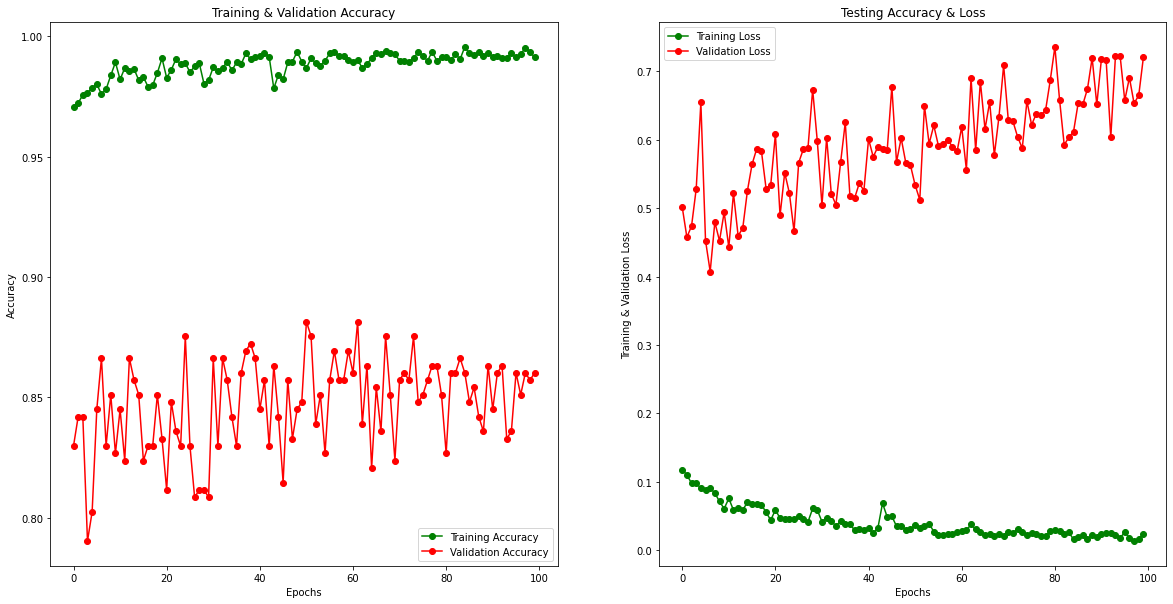

In [ ]:
epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, rounded_labels))

              precision    recall  f1-score   support

           0       0.90      0.61      0.73       215
           1       0.88      0.98      0.92       607

    accuracy                           0.88       822
   macro avg       0.89      0.79      0.83       822
weighted avg       0.88      0.88      0.87       822



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

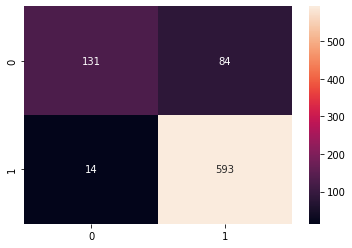

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test, rounded_labels), annot=True, fmt="d")

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, rounded_labels)
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = 1 - TNR
FNR = 1 - TPR
print("TPR:" "\n", TPR)
print()
print()
print("FPR:" "\n", FPR)
print()
print()
print("TNR:" "\n", TNR)
print()
print()
print("FNR:" "\n", FNR)

TPR:
 [0.60930233 0.97693575]


FPR:
 [0.02306425 0.39069767]


TNR:
 [0.97693575 0.60930233]


FNR:
 [0.39069767 0.02306425]


In [ ]:
yr_pred = y_pred.reshape(-1,1)
yr_pred.shape

(822, 1)

In [ ]:
fpr = {}
tpr = {}
thresh ={}

In [ ]:
metrics.roc_auc_score(y_test.reshape(-1,1), rounded_labels.reshape(-1,1), multi_class='ovr')

0.7931190375847669

In [ ]:
for i in range(2):
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, rounded_labels, pos_label=i)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


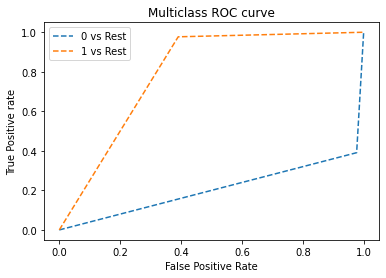

In [ ]:
for i in range(2):
  sns.lineplot(fpr[i], tpr[i], linestyle='--', label=f'{label[i]} vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=300);